In [1]:
import csv
import pandas as pd
from bs4 import BeautifulSoup
import requests
import PyPDF2
import numpy
import matplotlib
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

#nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import glob
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.model import CoherenceModel

#import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models



c:\users\chanc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
csvFile = pd.read_csv('justification_urls.csv')

In [7]:
csvFile.head(4)

,report,justification_de_url,justification_en_url,TA
0,"Abemaciclib (Mammakarzinom, HR+, HER2-, Kombin...",https://www.g-ba.de/downloads/40-268-5713/2019...,NaN,onkologische Erkrankungen
1,"Abemaciclib (Mammakarzinom, HR+, HER2-, Kombin...",https://www.g-ba.de/downloads/40-268-6185/2019...,https://www.g-ba.de/downloads/40-1465-6185/201...,onkologische Erkrankungen
2,Abemaciclib (Neubewertung nach Fristablauf: Ma...,https://www.g-ba.de/downloads/40-268-8515/2022...,NaN,onkologische Erkrankungen
3,Abemaciclib (Neues Anwendungsgebiet: Mammakarz...,NaN,NaN,onkologische Erkrankungen


In [8]:
#1.	Data Collection: A list of PDF links is provided for the URLs of all the Justification document from the G-BA website (For additional challenges, see Bonus 1).  Please do the following:
#a.	Evaluate the number of documents in English and German
#b.	Decide which language to use for your analysis


In [9]:
csvFile.count()

report                  818
justification_de_url    741
justification_en_url    354
TA                      818
dtype: int64

In [10]:
df=(csvFile.dropna())

In [11]:
#a.	Evaluate the number of documents in English and German
df["justification_en_url"]

1      https://www.g-ba.de/downloads/40-1465-6185/201...
8      https://www.g-ba.de/downloads/40-1465-7739/202...
9      https://www.g-ba.de/downloads/40-1465-7578/202...
10     https://www.g-ba.de/downloads/40-1465-7577/202...
15     https://www.g-ba.de/downloads/40-1465-7652/202...
                             ...                        
803    https://www.g-ba.de/downloads/40-1465-6239/201...
804    https://www.g-ba.de/downloads/40-1465-6236/201...
810    https://www.g-ba.de/downloads/40-1465-6370/202...
811    https://www.g-ba.de/downloads/40-1465-6053/201...
814    https://www.g-ba.de/downloads/40-1465-8358/202...
Name: justification_en_url, Length: 354, dtype: object

In [12]:
df["justification_en_url"].duplicated().any()
df["justification_en_url"].drop_duplicates()

1      https://www.g-ba.de/downloads/40-1465-6185/201...
8      https://www.g-ba.de/downloads/40-1465-7739/202...
9      https://www.g-ba.de/downloads/40-1465-7578/202...
10     https://www.g-ba.de/downloads/40-1465-7577/202...
15     https://www.g-ba.de/downloads/40-1465-7652/202...
                             ...                        
803    https://www.g-ba.de/downloads/40-1465-6239/201...
804    https://www.g-ba.de/downloads/40-1465-6236/201...
810    https://www.g-ba.de/downloads/40-1465-6370/202...
811    https://www.g-ba.de/downloads/40-1465-6053/201...
814    https://www.g-ba.de/downloads/40-1465-8358/202...
Name: justification_en_url, Length: 350, dtype: object

In [13]:
import requests
import re
import PyPDF2
from urllib.request import urlopen
from io import BytesIO


urls =  df.justification_en_url.tolist()

final_extracted_match = []

for url in urls:
    response = requests.get(url)
    my_raw_data = response.content


    with BytesIO(my_raw_data) as data:
        read_pdf = PyPDF2.PdfFileReader(data)
        extracted_text=""
        for page in range(read_pdf.getNumPages()):
            extracted_text += read_pdf.getPage(page).extractText()
        regex=re.compile(r'2\. Key points of the resolution(.*?)3\. Bureaucratic costs', re.DOTALL)
        matched_text = regex.findall(extracted_text)
        if len(matched_text) >1:
            final_extracted_match.append(matched_text[1]) 
            

# 3.	Data Cleaning: 

In [14]:
df = ""
for x in final_extracted_match:
    df+=x

In [15]:
#Contractions are nothing but shorthand forms for words like, Do not, would not, It is

import contractions
df=contractions.fix(df)

In [16]:
# convert to lower case and removing punctuation and any special characters
lower_string = df.lower()

no_punc_string = re.sub(r'[^\w\s]','', lower_string)
text = ''.join([i for i in no_punc_string if not i.isdigit()])

In [17]:
#Lemmatization
#ex:Apples-apple

lemmatizer = WordNetLemmatizer() 
new_df=lemmatizer.lemmatize(text)

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))
  
word_tokens = word_tokenize(new_df)
  
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
#print(word_tokens)



#print(filtered_sentence)

# Descriptive Analysis:

In [19]:
#Frquency of the words
frequency=nltk.FreqDist(filtered_sentence)

In [20]:
most_common=frequency.most_common(20)

In [21]:
frequency

FreqDist({'treatment': 15364, 'therapy': 15228, 'mg': 14293, 'patients': 11846, 'benefit': 11174, 'study': 10438, 'assessment': 8226, 'comparator': 7267, 'appropriate': 6611, 'additional': 6557, ...})

<AxesSubplot:>

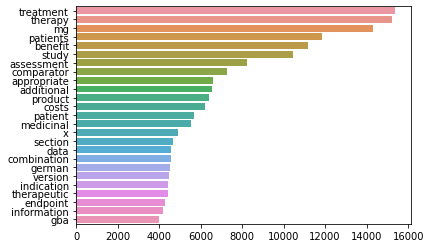

In [22]:
from collections import Counter
stop=set(stopwords.words('english'))
counter=Counter(filtered_sentence)
most=counter.most_common()

x, y= [], []
for word,count in most[:25]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [23]:
df = pd.DataFrame(frequency.items(),columns=['words', 'count'])

df.head(20)

,words,count
0,session,53
1,may,916
2,gba,3998
3,discussed,45
4,benefit,11174
5,assessment,8226
6,abemaciclib,31
7,combination,4553
8,fulvestrant,383
9,accordance,2888


In [24]:
df['word_count'] = df["words"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["words"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df.head(20)

,words,count,word_count,char_count,avg_word_length
0,session,53,1,7,7.0
1,may,916,1,3,3.0
2,gba,3998,1,3,3.0
3,discussed,45,1,9,9.0
4,benefit,11174,1,7,7.0
5,assessment,8226,1,10,10.0
6,abemaciclib,31,1,11,11.0
7,combination,4553,1,11,11.0
8,fulvestrant,383,1,11,11.0
9,accordance,2888,1,10,10.0


In [25]:
#sentimental analysis

df["sentiment"] = df["words"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
df

,words,count,word_count,char_count,avg_word_length,sentiment
0,session,53,1,7,7.0,0.0
1,may,916,1,3,3.0,0.0
2,gba,3998,1,3,3.0,0.0
3,discussed,45,1,9,9.0,0.0
4,benefit,11174,1,7,7.0,0.0
...,...,...,...,...,...,...
14307,dysplasias,1,1,10,10.0,0.0
14308,appliedaverage,1,1,14,14.0,0.0
14309,meticinalrotucwoe,1,1,17,17.0,0.0
14310,av獥vvet,1,1,7,7.0,0.0


In [26]:
most_common

[('treatment', 15364),
 ('therapy', 15228),
 ('mg', 14293),
 ('patients', 11846),
 ('benefit', 11174),
 ('study', 10438),
 ('assessment', 8226),
 ('comparator', 7267),
 ('appropriate', 6611),
 ('additional', 6557),
 ('product', 6428),
 ('costs', 6225),
 ('patient', 5684),
 ('medicinal', 5525),
 ('x', 4931),
 ('section', 4662),
 ('data', 4554),
 ('combination', 4553),
 ('german', 4536),
 ('version', 4460)]

In [27]:
cloud=WordCloud()
#from wordcloud import WordCloud
cloud=cloud.generate(new_df)
cloud

c:\users\chanc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\users\chanc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\users\chanc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\users\chanc\anaconda3\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if o

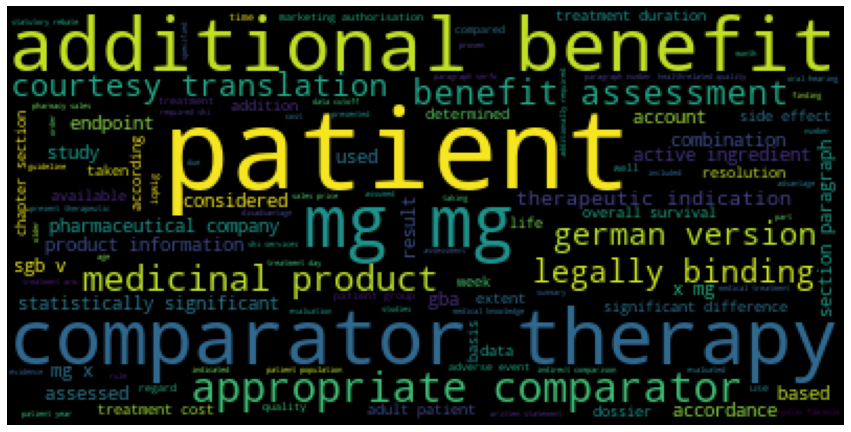

In [28]:
#plt.imshow(cloud)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis("off");

# LDA Modelling

In [29]:
filtered_sentence=nltk.Text(filtered_sentence)
print(filtered_sentence)

<Text: session may gba discussed benefit assessment abemaciclib combination...>


In [40]:
len(filtered_sentence)

897417

In [41]:
#create dictionary of words

#dictionary = corpora.Dictionary([filtered_sentence])


In [38]:
#words in the doc


doc_tokenized = [simple_preprocess(doc) for doc in filtered_sentence]

In [33]:
#create dictionary of words

dictionary = corpora.Dictionary(doc_tokenized)
#term doc frequency
corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]


# LDA model training

In [34]:
from pprint import pprint


In [35]:
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                    id2word=dictionary,
                                   num_topics = 4, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes = 1,
                                   alpha="auto")

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"study" + 0.045*"benefit" + 0.032*"years" + 0.027*"data" + '
  '0.018*"pharmaceutical" + 0.016*"company" + 0.015*"therapeutic" + '
  '0.015*"indication" + 0.014*"accordance" + 0.014*"services"'),
 (1,
  '0.046*"mg" + 0.040*"treatment" + 0.027*"therapy" + 0.025*"patients" + '
  '0.019*"costs" + 0.012*"results" + 0.011*"information" + 0.011*"comparator" '
  '+ 0.009*"account" + 0.009*"year"'),
 (2,
  '0.058*"product" + 0.046*"medicinal" + 0.038*"version" + 0.038*"german" + '
  '0.035*"number" + 0.031*"appropriate" + 0.031*"translation" + '
  '0.031*"legally" + 0.031*"binding" + 0.031*"courtesy"'),
 (3,
  '0.050*"assessment" + 0.035*"additional" + 0.032*"patient" + 0.030*"section" '
  '+ 0.025*"according" + 0.023*"gba" + 0.023*"endpoint" + 0.022*"available" + '
  '0.020*"taken" + 0.020*"based"')]


In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary,mds='mmds',R=30)
vis

c:\users\chanc\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.313118  0.142457       1        1  44.652413
0      0.112851 -0.280291       2        1  22.571958
3     -0.258665 -0.131946       3        1  18.245476
2     -0.167303  0.269780       4        1  14.530154, topic_info=             Term          Freq         Total Category  logprob  loglift
27          study  14223.000000  14223.000000  Default  30.0000  30.0000
903            mg  17848.000000  17848.000000  Default  29.0000  29.0000
42        product   7379.000000   7379.000000  Default  28.0000  28.0000
5      assessment   8047.000000   8047.000000  Default  27.0000  27.0000
4         benefit   8953.000000   8953.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
426    randomised    706.507103    707.326145   Topic4  -5.1932   1.9278
133         could    722.357904    723.210752   Topic4  -5.1711   1.9278
12908  neparvovec    820.127199   4177.052071   Topic4  -5.0441   0.3010
12996  vosoritide    809.385252   3793.484030   Topic4  -5.0573   0.3842
12907  voretigene    809.772951   4120.852783   Topic4  -5.0568   0.3019

[161 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         2  0.999758  accordance
216       3  0.999719   according
155       1  0.999635     account
91        4  0.999636      active
124       3  0.999770    addition
...     ...       ...         ...
197       2  0.999255        well
129       4  0.999053     whether
122       4  0.998758     written
853       1  0.999773        year
709       2  0.999898       years

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

In [42]:
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                    id2word=dictionary,
                                   num_topics = 8, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes = 3,
                                   alpha="auto")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary,mds='mmds',R=30)
vis

c:\users\chanc\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.294722  0.350619       1        1  79.745799
3      0.101247  0.430973       2        1   4.988610
4      0.410386 -0.186348       3        1   3.575218
6     -0.419887 -0.016669       4        1   3.055488
0      0.375516  0.186790       5        1   3.004212
1     -0.010687 -0.024445       6        1   2.686171
2     -0.259517 -0.353932       7        1   2.019626
7      0.097663 -0.386987       8        1   0.924875, topic_info=          Term          Freq         Total Category  logprob  loglift
27       study  13345.000000  13345.000000  Default  30.0000  30.0000
4      benefit  10967.000000  10967.000000  Default  29.0000  29.0000
5   assessment   8704.000000   8704.000000  Default  28.0000  28.0000
30      number   4826.000000   4826.000000  Default  27.0000  27.0000
70     version   5147.000000   5147.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
22     overall      0.122018   2858.702026   Topic8 -11.1028  -5.3784
23    survival      0.122018    220.044120   Topic8 -11.1028  -2.8141
24        data      0.122018   5646.682990   Topic8 -11.1028  -6.0591
25   available      0.122018   3820.800953   Topic8 -11.1028  -5.6685
27       study      0.122018  13345.328244   Topic8 -11.1028  -6.9192

[511 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         1  0.999825  accordance
216       7  0.999746   according
155       3  0.999662     account
91        2  0.999534      active
124       2  0.999729    addition
...     ...       ...         ...
197       3  0.999703        well
853       1  0.999813        year
709       1  0.999876       years
9739      1  0.672197       youth
2848      1  0.601511     zscores

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 7, 1, 2, 3, 8])

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_modellda_model, BoW_corpus, dictionary,mds='mmds',R=30)
vis

c:\users\chanc\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.294830  0.350748       1        1  79.728361
3      0.101262  0.430928       2        1   4.978421
4      0.410375 -0.186345       3        1   3.559266
6     -0.419828 -0.016708       4        1   3.039918
0      0.375530  0.186785       5        1   2.983924
1     -0.010687 -0.024448       6        1   2.679986
2     -0.259505 -0.353950       7        1   2.016795
7      0.097683 -0.387010       8        1   1.013328, topic_info=          Term        Freq         Total Category  logprob  loglift
27       study  13261.0000  13261.000000  Default  30.0000  30.0000
4      benefit  10913.0000  10913.000000  Default  29.0000  29.0000
5   assessment   8689.0000   8689.000000  Default  28.0000  28.0000
30      number   4822.0000   4822.000000  Default  27.0000  27.0000
70     version   5137.0000   5137.000000  Default  26.0000  26.0000
..         ...         ...           ...      ...      ...      ...
22     overall      0.1337   2853.585572   Topic8 -11.1028  -5.3766
23    survival      0.1337    217.689501   Topic8 -11.1028  -2.8033
24        data      0.1337   5653.253928   Topic8 -11.1028  -6.0602
25   available      0.1337   3814.872998   Topic8 -11.1028  -5.6669
27       study      0.1337  13261.881820   Topic8 -11.1028  -6.9129

[525 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         1  0.999758  accordance
216       7  0.999726   according
155       3  0.999732     account
91        2  0.999773      active
124       2  0.999535    addition
...     ...       ...         ...
197       3  0.999727        well
853       1  0.999682        year
709       1  0.999783       years
9739      1  0.668562       youth
2848      1  0.598834     zscores

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 7, 1, 2, 3, 8])

In [31]:
lda_modellda_model = gensim.models.ldamodel.LdaModel(corpus=BoW_corpus, 
                                    id2word=dictionary,
                                   num_topics = 4, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes = 1,
                                   alpha="auto")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_modellda_model, BoW_corpus, dictionary,mds='mmds',R=30)
vis

c:\users\chanc\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.181193 -0.230674       1        1  32.012012
3      0.219501  0.188496       2        1  31.318617
1     -0.176757  0.202989       3        1  19.125059
0     -0.223937 -0.160811       4        1  17.544312, topic_info=           Term         Freq        Total Category  logprob  loglift
27        study  6379.000000  6379.000000  Default  30.0000  30.0000
4       benefit  5131.000000  5131.000000  Default  29.0000  29.0000
167   treatment  7122.000000  7122.000000  Default  28.0000  28.0000
132     therapy  6854.000000  6854.000000  Default  27.0000  27.0000
169    patients  6652.000000  6652.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1838   fibrosis  1247.679975  4337.311614   Topic4  -4.1194   0.4945
183    mutation   748.551937  2500.875251   Topic4  -4.6303   0.5342
9108       cftr   746.969660  2610.126610   Topic4  -4.6324   0.4893
3764       gene   692.754660  2407.394717   Topic4  -4.7078   0.4948
9152         gd   620.777806  3122.210154   Topic4  -4.8175   0.1251

[175 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         1  0.999226  accordance
216       2  0.999260   according
155       1  0.999783     account
91        4  0.998216      active
124       4  0.998101    addition
...     ...       ...         ...
643       1  0.999222      weight
197       2  0.999613        well
122       4  0.998080     written
853       2  0.999211        year
709       2  0.999895       years

[170 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])